In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/17.mid
/content/13.mid
/content/7.mid
/content/Sitar, Bansuri Tabla trio  Rishab Prasanna & Sandip Banerjee & Nicolas Delaigue.mid
/content/9.mid
/content/1.mid
/content/Morning Meditation Ragas On Sitar - Peaceful Music for Relaxation - B. Sivaramakrishna Rao.mid
/content/Heal Ragas __ flute and sitar by Hariprasad chorsia__ calm mind__ Thumri in raag bhairavi.mid
/content/Pandit Ravi Shankar - Morning Meditation Ragas On Sitar  Indian Classical Instrumental Music.mid
/content/4.mid
/content/12.mid
/content/2.mid
/content/3.mid
/content/15.mid
/content/14.mid
/content/10.mid
/content/18.mid
/content/11.mid
/content/6.mid
/content/0.mid
/content/16.mid
/content/19.mid
/content/8.mid
/content/5.mid
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/configurations/config

In [ ]:
!pip install music21

In [ ]:
from music21 import *
def read_midi(file):

    print("Loading Music File:",file)

    notes=[]
    notes_to_parse = None

    #parsing a midi file
    midi = converter.parse(file)

    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:

        #select elements of only piano
        if 'Piano' in str(part):

            notes_to_parse = part.recurse()

            #finding whether a particular element is note or a chord
            for element in notes_to_parse:

                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))

                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='/content/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])


Loading Music File: /content/17.mid
Loading Music File: /content/13.mid
Loading Music File: /content/7.mid
Loading Music File: /content/Sitar, Bansuri Tabla trio  Rishab Prasanna & Sandip Banerjee & Nicolas Delaigue.mid
Loading Music File: /content/9.mid
Loading Music File: /content/1.mid
Loading Music File: /content/Morning Meditation Ragas On Sitar - Peaceful Music for Relaxation - B. Sivaramakrishna Rao.mid
Loading Music File: /content/Heal Ragas __ flute and sitar by Hariprasad chorsia__ calm mind__ Thumri in raag bhairavi.mid
Loading Music File: /content/Pandit Ravi Shankar - Morning Meditation Ragas On Sitar  Indian Classical Instrumental Music.mid
Loading Music File: /content/4.mid
Loading Music File: /content/12.mid
Loading Music File: /content/2.mid
Loading Music File: /content/3.mid
Loading Music File: /content/15.mid
Loading Music File: /content/14.mid
Loading Music File: /content/10.mid
Loading Music File: /content/18.mid
Loading Music File: /content/11.mid
Loading Music Fi

<ipython-input-4-1c587396b50b>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(path+i) for i in files])


In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]
#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))
# unique_notes

4172


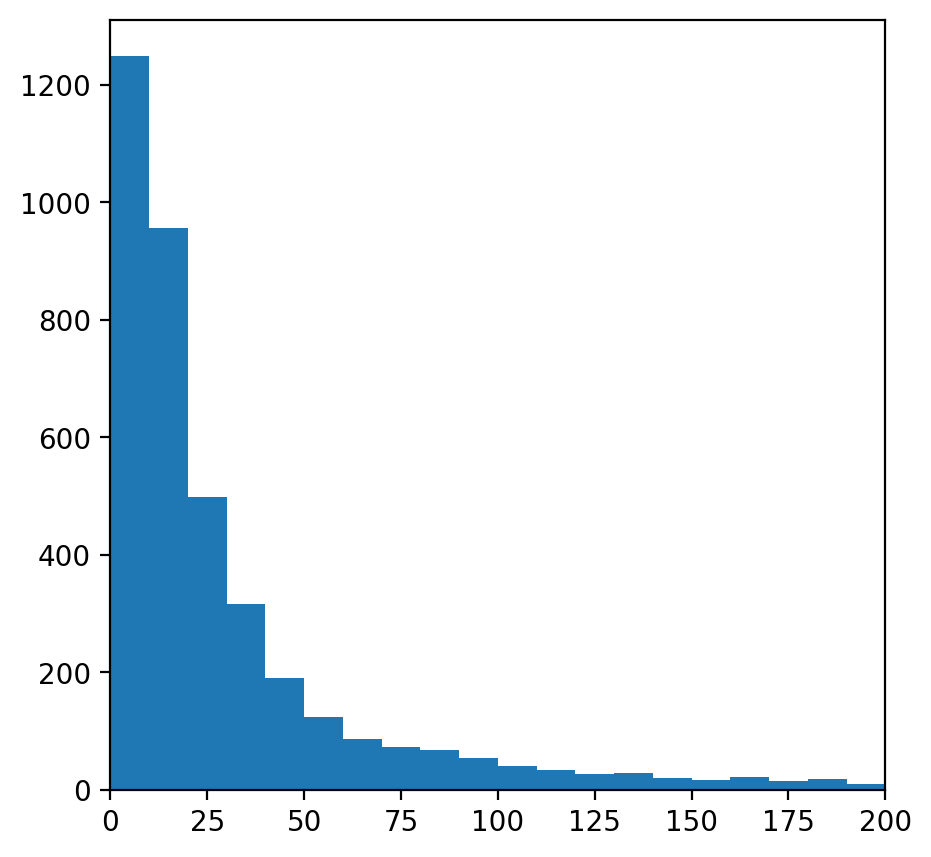

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

bins = [i * 10 for i in range(int(max(no) // 10) + 2)]

#plot
plt.hist(no, bins = bins)

plt.xlim(0, 200)

plt.show()

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>= 20]
print(len(frequent_notes))

1966


In [ ]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)
    new_music.append(temp)

new_music = np.array(new_music)

<ipython-input-8-3eb6be2fd841>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):

        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]

        x.append(input_)
        y.append(output)

x=np.array(x)
y=np.array(y)
print(x.shape, y.shape)
print(x)
print(y)

(509232, 32) (509232,)
[['6.9.0.2' '0.2.6' 'A5' ... '5.6' '1.2.4.6.9' '11.0.1.6']
 ['0.2.6' 'A5' '9.2' ... '1.2.4.6.9' '11.0.1.6' '9.1.2']
 ['A5' '9.2' 'D7' ... '11.0.1.6' '9.1.2' 'D5']
 ...
 ['7.9.11.0.2.3.4.5' '0.2.3.4' 'F#5' ... '0.2.4.6.9' '1.2.4.8.9' '2.4']
 ['0.2.3.4' 'F#5' '9.0.1.2.4.5' ... '1.2.4.8.9' '2.4' '9.10.11.0.4.5']
 ['F#5' '9.0.1.2.4.5' '0.1.2.4.5' ... '2.4' '9.10.11.0.4.5' '4.5.10.11']]
['9.1.2' 'D5' 'D4' ... '9.10.11.0.4.5' '4.5.10.11' '10.2']


In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
print(unique_x)

['9.11.1.2.4.5.6', '8.9.11.2', '4.5.7.9.0', '5.6.8.9.11.0.1.2', '10.11.2.4.5.6', '2.4.6.10', '1.2.4.6.7.8.9.10', '11.2.5.7', '0.1.2.4.5.7.9', '1.2.3.4.5.7.9', 'C#0', '1.4.5.6.9', 'G2', '10.1.2.3.4.5.6', '1.3.7.9', '1.2.5.7.8', '4.6.7.9.10.11.0', '10.1.3', '6', '6.7.8.9.11.1.2.4', '0.4.7.8', '6.7.9.11', '1.4.7.8.9', '2.6.8.9.10', '7.9', '1.2.6.9', '9.10.2.4.5', '11.0.1.2.4.7', '6.7.8.9.0.2', '5.8.11', '1.2.3.4.5.8.9', '2.4.5.7.9.10', '6.11.0', '9.10.2.4', '8.9.0', '3.7.8.9', '8.9.11.1.2.4', '0.1.2.4.5.6.8.9', '0.3.4.5.6', '9.10.0.2', '5.6.7.9.10.0.2', '2.4.5.6.9', '4.5.6.7.8.9.10.1', '2.3.4.5.6.9', '6.7.9.11.0', '1.3.5', '4.7.9.0', '10.11.0.4.5', '5.7.9.11.1.2', '4.5.9.0', '6.7.8.1', '1.3.4.5.8.9', '4.5.6.7.10', '1.3.4', '9.10.11.1.4.6', '11.3', '2.3.4.8.9', '9.0.3.4.5', '1.2.3.5.6.7.8.9', '1.2.4.6', '7.8.9.1', '0.4.7', 'C#3', '7.10.11.0.2', '10.11.0.1.2', '6.7.9.10', '1.4.6.7.8', '11.0.1.4', '0.4.5', '5.6.9.11.2', '1.2.3.4.5.6.8.9.10', '9.0.2.3.4.5.6', '2.3.4.5.6.7.8.9.10.11', '2.4.7.9

In [ ]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)

x_seq = np.array(x_seq)
x_seq

array([[1464,  851,  585, ...,  542,  529, 1890],
       [ 851,  585, 1620, ...,  529, 1890, 1844],
       [ 585, 1620, 1063, ..., 1890, 1844, 1293],
       ...,
       [1600,  925, 1932, ..., 1751, 1096, 1463],
       [ 925, 1932, 1301, ..., 1096, 1463, 1803],
       [1932, 1301,  705, ..., 1463, 1803, 1398]])

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y))
y_seq=np.array([y_note_to_int[i] for i in y])
y_seq

array([1844, 1293, 1737, ..., 1803, 1398, 1400])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
# def lstm():
#   model = Sequential()
#   model.add(LSTM(128,return_sequences=True))
#   model.add(LSTM(128))
#   model.add(Dense(256))
#   model.add(Activation('relu'))
#   model.add(Dense(n_vocab))
#   model.add(Activation('softmax'))
#   model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#   return model

In [ ]:
from keras.layers import (Dense,
                            Flatten,Conv1D,Embedding,MaxPool1D,Dropout,GlobalMaxPool1D)
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
# import keras.backend as K

# K.clear_session()
model = Sequential()

#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True))

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

#model.add(Conv1D(256,5,activation='relu'))
model.add(GlobalMaxPool1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           196600    
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [ ]:
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = "../working/saved_models-improvement-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath,monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=20, validation_data=(np.array(x_val),np.array(y_val)),verbose=1)

Epoch 1/20
3183/3183 [==============================] - 333s 104ms/step - loss: 5.6910 - acc: 0.0454 - val_loss: 5.6130 - val_acc: 0.0504
Epoch 2/20
3183/3183 [==============================] - 329s 103ms/step - loss: 5.4923 - acc: 0.0525 - val_loss: 5.4629 - val_acc: 0.0560
Epoch 3/20
3183/3183 [==============================] - 326s 102ms/step - loss: 5.3261 - acc: 0.0576 - val_loss: 5.3382 - val_acc: 0.0609
Epoch 4/20
3183/3183 [==============================] - 321s 101ms/step - loss: 5.1786 - acc: 0.0627 - val_loss: 5.2069 - val_acc: 0.0650
Epoch 5/20
3183/3183 [==============================] - 328s 103ms/step - loss: 5.0541 - acc: 0.0667 - val_loss: 5.1655 - val_acc: 0.0690
Epoch 6/20
3183/3183 [==============================] - 324s 102ms/step - loss: 4.9556 - acc: 0.0706 - val_loss: 5.0716 - val_acc: 0.0714
Epoch 7/20
3183/3183 [==============================] - 335s 105ms/step - loss: 4.8792 - acc: 0.0733 - val_loss: 5.0202 - val_acc: 0.0731
Epoch 8/20
3183/3183 [============

In [ ]:
# #loading best model
# from keras.models import load_model
# model = load_model('best_model.h5')

In [ ]:
len(x_val)
x_val

array([[1958, 1829,  269, ..., 1123, 1578,  334],
       [ 431, 1748,  797, ...,  585, 1293, 1290],
       [  77, 1700, 1293, ...,  652, 1463,  613],
       ...,
       [ 549, 1947, 1724, ...,  549,  352,  191],
       [1941,  585,  398, ..., 1371, 1123, 1669],
       [ 585, 1280, 1448, ..., 1305,  549, 1870]])

In [ ]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(25):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    r = random.randrange(0,2)
    if (r == 0):
        y_pred= np.argmax(prob,axis=0)
    else:
        max_index = np.argmax(prob)
        prob[max_index] = -np.inf
        y_pred = np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]

print(predictions)

1/1 [==============================] - 0s 22ms/step
[1293, 1293, 1293, 1229, 1229, 1229, 1229, 1293, 1620, 585, 1293, 1293, 1293, 585, 1293, 1293, 1293, 585, 1293, 585, 536, 585, 1620, 585, 585]


In [ ]:
random_music

array([1720, 1293,  952, 1737, 1063, 1448, 1811, 1293, 1293, 1293, 1229,
       1229, 1229, 1229, 1293, 1620,  585, 1293, 1293, 1293,  585, 1293,
       1293, 1293,  585, 1293,  585,  536,  585, 1620,  585,  585])

In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x))
predicted_notes = [x_int_to_note[i] for i in predictions]
predicted_notes

['D5',
 'D5',
 'D5',
 'C#5',
 'C#5',
 'C#5',
 'C#5',
 'D5',
 '9.2',
 'A5',
 'D5',
 'D5',
 'D5',
 'A5',
 'D5',
 'D5',
 'D5',
 'A5',
 'D5',
 'A5',
 'C5',
 'A5',
 '9.2',
 'A5',
 'A5']

In [ ]:
from music21 import note, chord, instrument, stream, tempo

def convert_to_midi(prediction_output):

    offset = 0
    output_notes = []
    midi_stream = stream.Stream()

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:

        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:

                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Banjo()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)

        # pattern is a note
        else:

            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Banjo()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

convert_to_midi(predicted_notes)

In [ ]:
predicted_notes

['A5',
 'A5',
 'A5',
 'A5',
 'A5',
 'C5',
 'C5',
 '9.2',
 'A5',
 'A5',
 '9.2',
 '2.7',
 '9.2',
 'D6',
 'A5',
 'C#5',
 '2.4',
 'C#5',
 'E5',
 'E5',
 'A3',
 'A5',
 '2.4',
 'A5',
 'A5']

In [ ]:
from music21 import note, chord, instrument, stream

def convert_to_midi(prediction_output, note_duration=1.0):
    offset = 0
    output_notes = []
    midi_stream = stream.Stream()

    # Logic to condense repeated notes and their durations
    condensed_notes = []
    current_note = prediction_output[0]
    note_count = 1

    for i in range(1, len(prediction_output)):
        if prediction_output[i] == current_note:
            note_count += 1
        else:
            condensed_notes.append((current_note, note_count * note_duration))
            current_note = prediction_output[i]
            note_count = 1

    # Append the last set of notes
    condensed_notes.append((current_note, note_count * note_duration))

    # create note and chord objects based on the condensed sequence
    for pattern, duration in condensed_notes:
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                cn = int(current_note)
                new_note = note.Note(cn, quarterLength=duration)
                new_note.storedInstrument = instrument.Banjo()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        else:
            new_note = note.Note(pattern, quarterLength=duration)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Banjo()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += duration - 1

    # Add the notes to the stream
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

# You can adjust the note duration as needed
convert_to_midi(predicted_notes, note_duration=1.5)  # Use a different note duration if required
